### A Brief Justification for the Suitability of the Data Set

**Reason:**

The Global Weather Dataset has weather information from many places around the world. It talks about important weather factors like temperature, humidity, and rainfall. The file is perfect for weather research and forecasting on a world scale because it covers a lot of ground and has a lot of information. This information can be used to look at the effects of climate change, area weather trends, and extreme weather events.

### Data Processing (20 Marks):

In [16]:
# Importing the necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computation

### 2.2 Load the dataset

In [17]:
# Load the dataset
data = pd.read_csv('GlobalWeatherRepository.csv')

### 2.3 Data visualization

In [18]:
# Display the first 5 rows of the dataset
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


### 2.4  Check for Missing Values

In [19]:
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

### 2.5 Check Data Types
* This helps us understand which columns might need data type conversions.

In [20]:
# data types
data.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


### 2.6 Cleaning Up Data



In [21]:
# first of all I will check the percentage of missing values in each column
missing_values = data.isnull().mean() * 100
print(missing_values)  # as we see data are clean and there are no missing values
# Also I want to check which values are they like str,int,float,etc.
data.info()

country                         0.0
location_name                   0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0.0
air_quality_Carbon_Monoxide 

### 2.6.2 Data Type Conversion

 ### a. Convert the Date and Time columns

Determine which columns should be datetime formatted and convert them.

Soo lets looking at the data types, we can observe the following:

**Geographic Location and Basic Details:** The 'country', 'location_name', 'latitude', 'longitude', and 'timezone' columns provide the location and time zone of each observation. These columns seem to have the correct data types ('Object' and 'float64').

**Update time:** The columns 'last_updated_epoch' (an epoch timestamp) and 'last_updated' (which may be in readable date format) denote the update time. If you wish to do an analysis in date format, you must convert the 'last_updated' column to 'datetime'.

**Temperature and Condition Details:** The 'temperature_celsius' and 'temperature_fahrenheit' columns include temperature data, and 'condition_text' offers textual information on the current weather conditions.

In this case, the only modification required is to convert the 'last_updated' column to 'datetime' format. Following that, you may review the cleaned data, which we may save.


In [22]:
# Convert 'last_updated' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])
# Converting other time columns to datetime

# showing cleaned data
data.to_csv('GlobalWeatherRepository.csv', index=False)

# describe the data
data.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,30681.000000,30681.000000,3.068100e+04,30681,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,...,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000
mean,19.131610,21.971486,1.722668e+09,2024-08-03 09:07:14.936931840,25.672680,78.212399,8.550041,13.764014,175.969004,1012.490238,...,20.237509,459.956724,64.817512,10.163434,7.377412,17.988943,33.859029,1.444347,1.980965,50.268603
min,-41.300000,-175.200000,1.715849e+09,2024-05-16 01:45:00,-10.400000,13.200000,2.200000,3.600000,1.000000,971.000000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.370000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.719150e+09,2024-06-23 15:45:00,22.000000,71.600000,4.300000,6.800000,92.000000,1009.000000,...,11.400000,205.300000,34.700000,0.600000,0.500000,2.900000,5.200000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.722775e+09,2024-08-04 13:30:00,26.500000,79.700000,7.600000,12.200000,172.000000,1013.000000,...,18.400000,263.700000,60.000000,2.035000,1.500000,8.000000,13.600000,1.000000,1.000000,51.000000
75%,40.400000,49.882200,1.726143e+09,2024-09-12 15:15:00,29.900000,85.900000,11.900000,19.100000,260.000000,1016.000000,...,26.300000,400.500000,89.400000,7.955000,5.500000,18.500000,32.700000,2.000000,2.000000,85.000000
max,64.150000,179.220000,1.729502e+09,2024-10-21 22:15:00,49.200000,120.600000,1841.200000,2963.200000,360.000000,1045.000000,...,2970.400000,38879.398000,480.700000,427.700000,255.855000,1614.100000,1814.400000,6.000000,10.000000,100.000000
std,24.485212,65.854620,4.012183e+06,NaN,7.199447,12.959135,11.737817,18.890339,100.294082,6.255296,...,20.239219,1062.291619,42.495528,22.537769,59.872208,48.097274,77.102573,0.821191,1.995488,35.110587


### Step 3: Data Analysis and Visualization.

I will now do some simple analysis and build visualizations to better comprehend the data's important trends. Here is what I will do:

**Global Temperature Summary:** Determine the top five warmest and coolest regions.

**Group Analysis:** Calculate the average temperature per area or nation.

**Visualizations:** Create at least two visualizations, including a histogram of world temperatures.
- A line map of temperature variations over time in a specified location.


### 3.1 Global Temperature Summary
* To find the top 5 hottest and coldest locations globally, we’ll sort the dataset by the temperature_celsius column and then select the top and bottom entries.

In [23]:
# Top 5 hottest locations
hottest_locations = data.sort_values(by='temperature_celsius', ascending=False).head(5)
print("Top 5 Hottest Locations:\n", hottest_locations[['location_name', 'country', 'temperature_celsius']])

# Top 5 coldest locations
coldest_locations = data.sort_values(by='temperature_celsius', ascending=True).head(5)
print("Top 5 Coldest Locations:\n", coldest_locations[['location_name', 'country', 'temperature_celsius']])


Top 5 Hottest Locations:
       location_name country  temperature_celsius
6896    Kuwait City  Kuwait                 49.2
11145       Baghdad    Iraq                 49.1
7460        Baghdad    Iraq                 49.1
8425    Kuwait City  Kuwait                 48.9
11338       Baghdad    Iraq                 48.8
Top 5 Coldest Locations:
       location_name   country  temperature_celsius
30600   Ulaanbaatar  Mongolia                -10.4
29235   Ulaanbaatar  Mongolia                 -8.4
29820   Ulaanbaatar  Mongolia                 -7.9
30405   Ulaanbaatar  Mongolia                 -6.7
30015   Ulaanbaatar  Mongolia                 -6.1


### 3.2 Group Analysis
* Now I'll run a group analysis to get the average temperature by nation. This may aid in determining general temperature trends in various places.

In [24]:
# Average temperature by country
avg_temp_by_country = data.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)
print("Average Temperature by Country:\n", avg_temp_by_country)


Average Temperature by Country:
 country
Saudi Arabien               45.000000
Iraq                        41.625316
Saudi Arabia                41.282803
Kuwait                      41.204430
Marrocos                    40.300000
                              ...    
United States of America    10.920513
New Zealand                 10.859494
Iceland                      8.517089
Australia                    7.024684
Chile                        6.955063
Name: temperature_celsius, Length: 210, dtype: float64


### 3.3 Visualization 
* Next, I will develop some visualizations:

* Histogram of Global Temperatures: This depicts the distribution of temperatures across all places.
Line Plot of Temperature Over Time: If we have time data (such as last_updated), we can make a line plot to examine how temperatures vary over time in a given place.


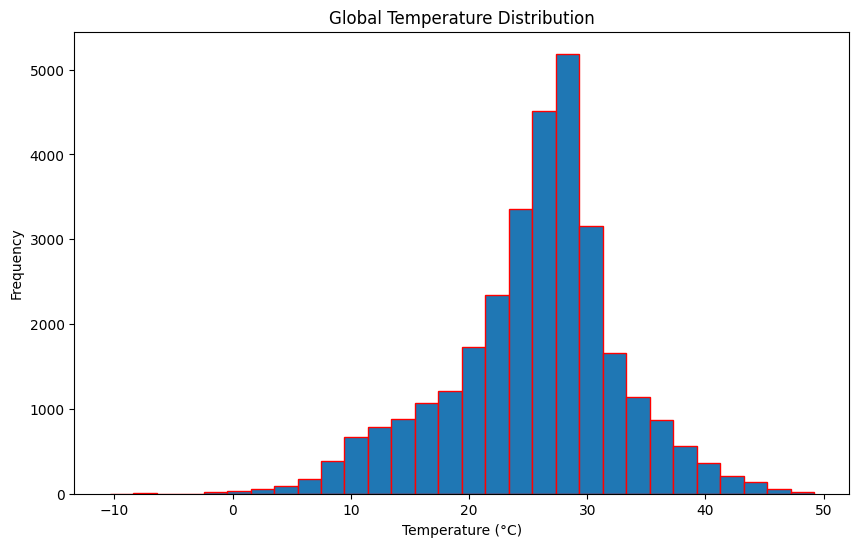

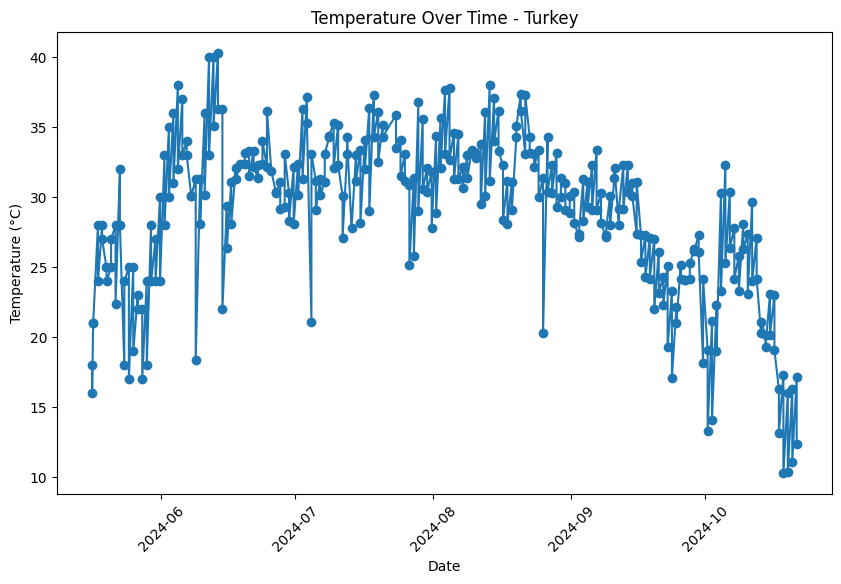

In [25]:
import matplotlib.pyplot as plt

# Histogram of Global Temperatures
plt.figure(figsize=(10, 6))
plt.hist(data['temperature_celsius'], bins=30, edgecolor='red')
plt.title('Global Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Line Plot of Temperature Over Time for Turkey
turkey_data = data[data['country'] == 'Turkey']  # Filter for data from Turkey
plt.figure(figsize=(10, 6))
plt.plot(turkey_data['last_updated'], turkey_data['temperature_celsius'], marker='o')
plt.title('Temperature Over Time - Turkey')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()